In [1]:
# Importanto bibliotecas.
import pandas as pd
from datetime import date
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

# Configurações gerais para os graficos.
sns.set(rc={"figure.figsize": (10, 8)})
sns.set(style="whitegrid")

In [2]:
# Configuração das variaveis para leitura dos arquivos.
path = 'caged_data/'
extension = '.txt'
filenames = []
file_prefix = "CAGEDMOV2020"
for x in range(12):
    if(x > 8):
        file_name = file_prefix + str(x+1)
    else:
        file_name = file_prefix + "0" + str(x+1)
    filenames.append(file_name)
print(filenames)

['CAGEDMOV202001', 'CAGEDMOV202002', 'CAGEDMOV202003', 'CAGEDMOV202004', 'CAGEDMOV202005', 'CAGEDMOV202006', 'CAGEDMOV202007', 'CAGEDMOV202008', 'CAGEDMOV202009', 'CAGEDMOV202010', 'CAGEDMOV202011', 'CAGEDMOV202012']


In [3]:
# Função para percorrer os arquivos de dados e popular o dataframe.
def populate_data_frame():
    for file in filenames:
        df= pd.read_csv(path+file+extension,  sep=';', usecols=[8, 10, 13, 16])

    return df

In [4]:
# Quantidade de linhas e colunas no dataframe.
df = populate_data_frame()
df.reset_index()
df.shape

(2546466, 4)

In [5]:
# Exemplo dos dados que seram utilizados.
df.head(10)

,categoria,idade,sexo,tipomovimentação
0,101,37.0,3,20
1,106,23.0,3,43
2,101,17.0,3,43
3,101,31.0,3,31
4,101,23.0,1,40
5,101,20.0,1,20
6,101,20.0,3,43
7,101,32.0,1,20
8,101,26.0,3,31
9,101,48.0,3,31


In [8]:
#Quantidade de linhas e colunas do DataFrame
df.shape

(2546466, 4)

In [10]:
#Descrição do Index
df.index


RangeIndex(start=0, stop=2546466, step=1)

In [11]:
#Colunas presentes no DataFrame
df.columns

Index(['categoria', 'idade', 'sexo', 'tipomovimentação'], dtype='object')

In [12]:
#Contagem de dados não-nulos
df.count()

categoria           2546466
idade               2546462
sexo                2546466
tipomovimentação    2546466
dtype: int64

In [16]:
#Resumo estatístico do DataFrame, com quartis, mediana, etc.
df.describe()

,categoria,idade,sexo,tipomovimentação
count,2.546466e+06,2.546462e+06,2.546466e+06,2.546466e+06
mean,1.444854e+02,3.105629e+01,1.821554e+00,2.876309e+01
std,1.913886e+02,1.077985e+01,9.839499e-01,1.151554e+01
min,1.010000e+02,1.400000e+01,1.000000e+00,1.000000e+01
25%,1.010000e+02,2.200000e+01,1.000000e+00,2.000000e+01
50%,1.010000e+02,2.900000e+01,1.000000e+00,3.100000e+01
75%,1.010000e+02,3.800000e+01,3.000000e+00,4.000000e+01
max,9.990000e+02,9.900000e+01,3.000000e+00,9.900000e+01


In [19]:
#Ordenando em ordem crescente
df.sort_values('sexo')

,categoria,idade,sexo,tipomovimentação
1273232,101,19.0,1,20
1477941,101,44.0,1,20
1477940,101,39.0,1,20
1477939,101,46.0,1,20
1477937,101,33.0,1,10
...,...,...,...,...
452201,101,32.0,3,31
787384,101,26.0,3,20
452199,103,17.0,3,43
452207,101,27.0,3,31


/usr/lib/python3/dist-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


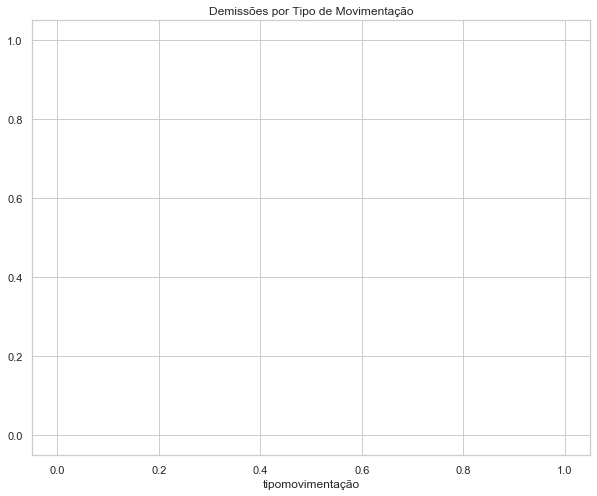

In [20]:
desligamento = df.query('tipomovimentação=="31" or tipomovimentação=="32" or tipomovimentação=="40" or tipomovimentação=="45" or tipomovimentação=="50" or tipomovimentação=="60" or tipomovimentação=="80" or tipomovimentação=="90" or tipomovimentação=="98"')

desligamento.groupby(['tipomovimentação']).tipomovimentação.count().sort_values()[1:].plot(kind='line', title="Demissões por Tipo de Movimentação")

/usr/lib/python3/dist-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


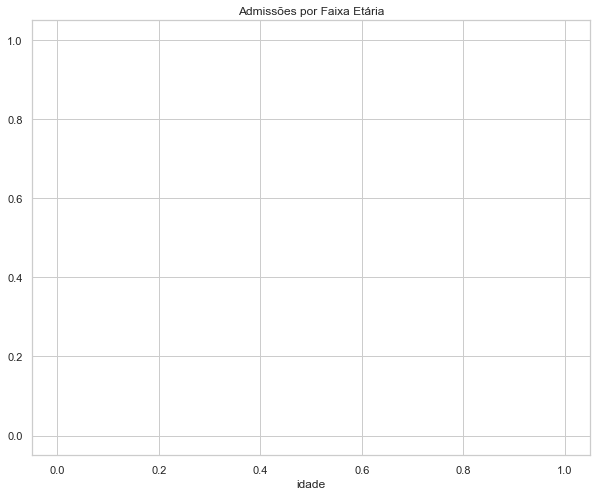

In [28]:
admissoes = df.query('tipomovimentação=="10" or tipomovimentação=="20" or tipomovimentação=="25" or tipomovimentação=="35" or tipomovimentação=="70"')

admissoes.groupby('idade').size().sort_values().plot(kind='line', title="Admissões por Faixa Etária")

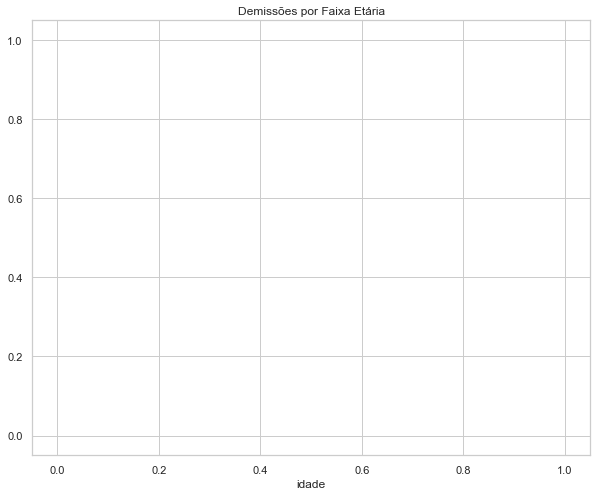

In [29]:
desligamento.groupby('idade').size().sort_values().plot(kind='line', title="Demissões por Faixa Etária")

IndexError: list index out of range

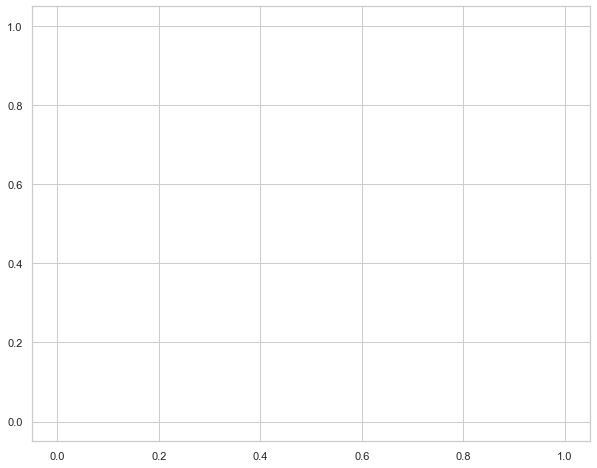

In [30]:

desligamento.groupby('sexo').size().sort_values().plot(kind='bar', color=['red', 'blue'], title="Demissões por Sexo", legend=True)

red_patch = mpatches.Patch(color='black', label='Feminino')
blue_patch = mpatches.Patch(color='blue', label='Masculino')
plt.legend(handles=[red_patch, blue_patch])

IndexError: list index out of range

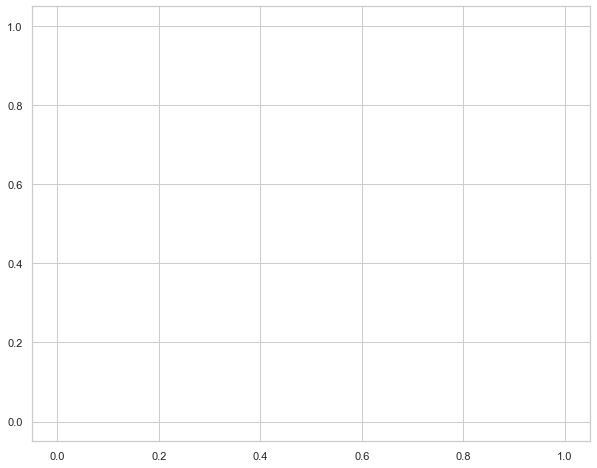

In [34]:
admissoes.groupby('sexo').size().sort_values().plot(kind='bar', color=['red', 'blue'], title="Admissões por Sexo", legend=True)

red_patch = mpatches.Patch(color='red', label='Feminino')
blue_patch = mpatches.Patch(color='black', label='Masculino')
plt.legend(handles=[red_patch, blue_patch])

In [32]:
categoria = df.query('categoria=="111" or categoria=="32" or tipomovimentação=="40" or tipomovimentação=="45" or tipomovimentação=="50" or tipomovimentação=="60" or tipomovimentação=="80" or tipomovimentação=="90" or tipomovimentação=="98"')

IndexError: list index out of range

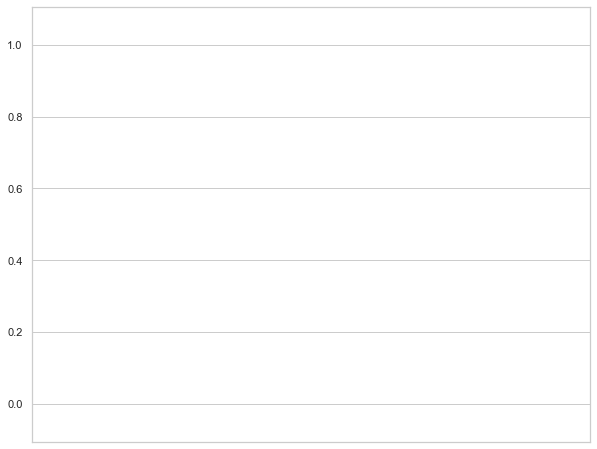

In [33]:
# Quantidade de vendas para o Produto A
desligamento_masculino = df.query('(tipomovimentação=="31" or tipomovimentação=="32" or tipomovimentação=="40" or tipomovimentação=="45" or tipomovimentação=="50" or tipomovimentação=="60" or tipomovimentação=="80" or tipomovimentação=="90" or tipomovimentação=="98") and sexo=="1"')

# Quantidade de vendas para o Produto B
desligamento_feminino = df.query('(tipomovimentação=="31" or tipomovimentação=="32" or tipomovimentação=="40" or tipomovimentação=="45" or tipomovimentação=="50" or tipomovimentação=="60" or tipomovimentação=="80" or tipomovimentação=="90" or tipomovimentação=="98") and sexo=="3"')

# Cria eixo x para produto A e produto B com uma separação de 0.25 entre as barras
x1 =  np.arange(len(desligamento_masculino.groupby(['tipomovimentação']).tipomovimentação.count()))
x2 = [x + 0.25 for x in x1]

# Plota as barras
plt.bar(x1, desligamento_masculino.groupby(['tipomovimentação']).tipomovimentação.count(), width=0.25, label = 'Masculino', color = 'blue')
plt.bar(x2, desligamento_feminino.groupby(['tipomovimentação']).tipomovimentação.count(), width=0.25, label = 'Feminino', color = 'red')

# coloca o nome dos meses como label do eixo x
meses =  ['31','40','45','90','32', '60', '50', '98']
plt.xticks([x + 0.25 for x in range(len(desligamento_masculino.groupby(['tipomovimentação']).tipomovimentação.count()))], meses)

# inseri uma legenda no gráfico
plt.legend()

plt.title("Causas das Demissões por Gênero")
plt.show()